# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [15]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [16]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [17]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
x = pd.DataFrame(onehotencoder.fit_transform(df[['uid']]).toarray())
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
## Вместо OneHotEncoder проще всего исопльзовать функцию get_dummies
df = pd.get_dummies(data=df, prefix=['uid', 'labname'], columns=['uid', 'labname'], dtype=int)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,6,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,7,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,8,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# нормализуем некоторые столбцы
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df.to_csv('../data/dayofweek.csv', index=False)

In [21]:
y = df['dayofweek']
more = np.array([np.argmax(np.bincount(y))] * len(y))
accuracy_score(y, more)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [22]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
lr = LogisticRegression(random_state=21, fit_intercept=False)
lr.fit(X,y)
pred = lr.predict(X)
accuracy_score(y, pred)

0.6405693950177936

In [23]:
pd.DataFrame(lr.coef_)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.029005,0.061026,0.884121,-0.723559,-1.208762,-0.135258,0.126853,-0.244991,0.993431,-0.572803,...,0.884121,0.602300,0.603172,-0.346193,0.050618,-0.525767,-1.747954,-0.419893,-0.804589,0.226438
1,0.520431,-0.322049,-0.093824,-0.763762,0.481682,-0.073221,0.051735,1.871671,1.074481,-0.352953,...,-0.093824,-0.076851,-0.069422,-0.003635,0.004246,-0.756328,-1.235637,1.755099,1.380042,0.492281
2,0.644307,0.545502,-0.103414,-0.558752,1.534589,-0.180527,-0.446227,-0.789208,-2.008732,-0.422998,...,-0.103414,-0.027515,-0.024187,-0.514225,-0.186436,0.072165,-0.769140,-0.921141,1.649887,-0.091187
3,0.846337,-0.148299,-0.078503,2.087462,0.980044,-0.268716,0.119724,-1.066908,-1.898386,0.834030,...,-0.078503,-0.122979,-0.105406,-0.872825,-0.626567,0.142659,0.705504,0.578440,1.394518,1.677473
4,-0.806575,0.039353,-0.221544,-0.576439,-0.349796,-0.528920,-1.195206,-1.017963,-0.978405,-0.450573,...,-0.221544,-0.067327,-0.077054,-0.899480,-1.233755,-0.878456,0.822991,-1.677777,-1.979854,-0.784771
5,-0.795628,-0.020031,-0.218010,-0.653905,0.070209,-0.912791,-0.921143,0.515673,2.461264,-0.043884,...,-0.218010,-0.037672,-0.043180,0.401015,1.182991,0.068030,1.903793,-0.885207,-1.475451,-1.265619
6,-0.379867,-0.155502,-0.168826,1.188955,-1.507966,2.099431,2.264264,0.731726,0.356347,1.009181,...,-0.168826,-0.269957,-0.283923,2.235342,0.808902,1.877696,0.320443,1.570478,-0.164552,-0.254616


In [24]:
def plot_features(coefs, features, n=10):
    fig, ax = plt.subplots(figsize=(15, 8)) # определяем параметры графика
    coefs /= coefs.sum() # коэффициенты берем с удельным весом
    indices = coefs.argsort()[::-1][:n] # индексами берем фичи (аргументы коэффициентов регрессии), отсортированные по возрастанию, поэтому срез с конца, последние n
    ax.barh(np.arange(n), coefs[indices])
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis() # сделаем, чтобы более значимые фичи были сверху
    plt.show()

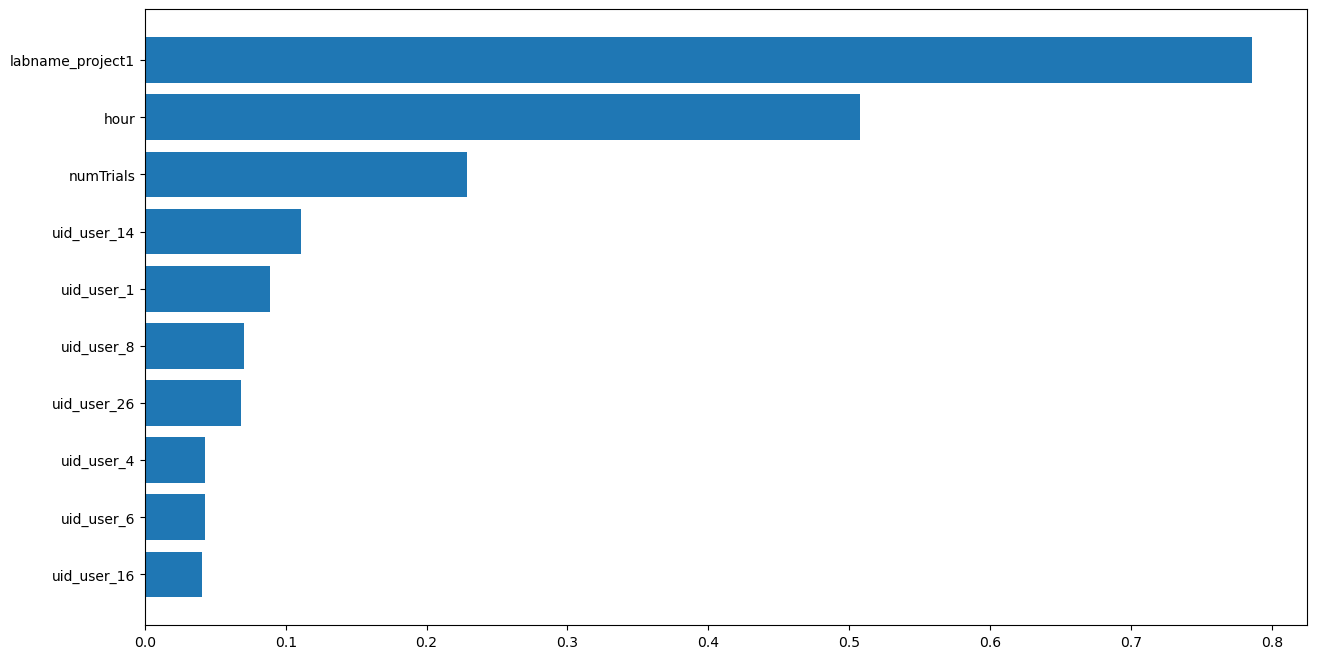

In [25]:
plot_features(lr.coef_.mean(axis=0), X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [42]:
svc = SVC(kernel='linear', probability=True, random_state=21)
svc.fit(X,y)
pred = svc.predict(X)
accuracy_score(y, pred)

0.702846975088968

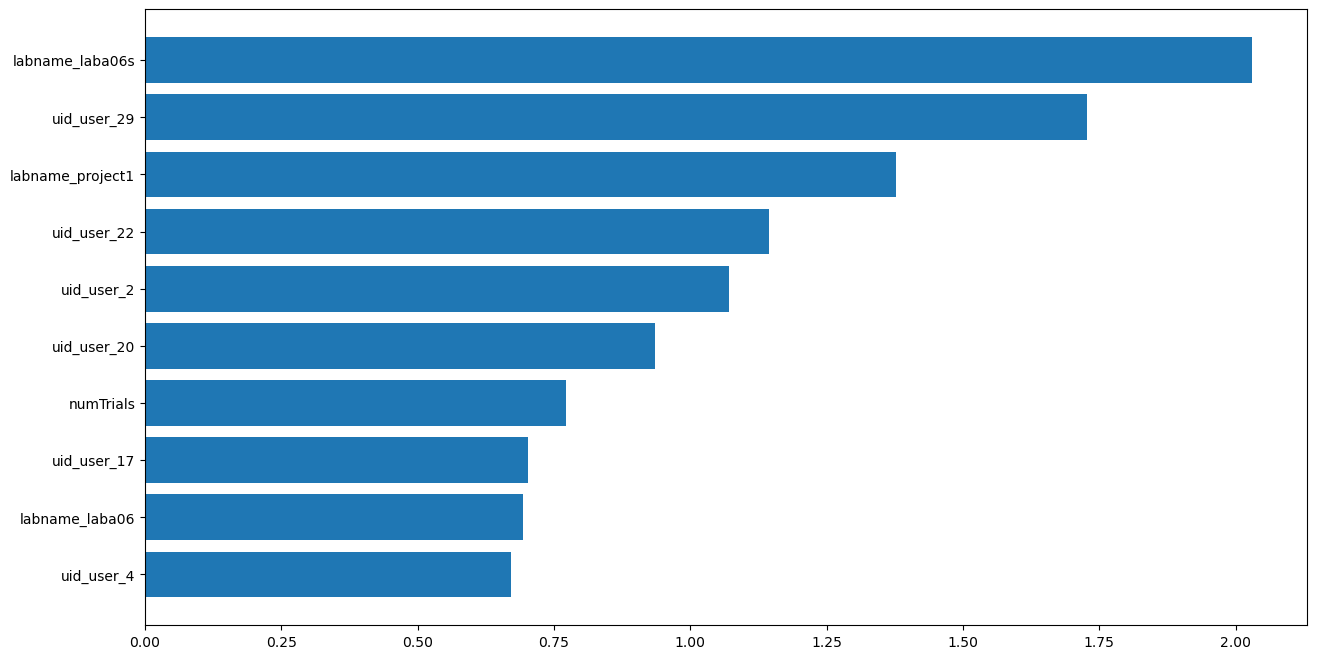

In [43]:
# Нарисуем график
plot_features(svc.coef_.mean(axis=0), X.columns)

In [45]:
# Смотрим какое ядро окажется лучшим
svc = SVC(probability=True, random_state=21)
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
gs = GridSearchCV(svc, param_grid, scoring='accuracy')
gs.fit(X, y)
gs.best_params_

{'kernel': 'poly'}

In [46]:
pred = gs.predict(X)
accuracy_score(y, pred)

0.8594306049822064

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [50]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=21)
dtc.fit(X, y)
pred = dtc.predict(X)
accuracy_score(y, pred)

0.5516014234875445

In [51]:
dtc = DecisionTreeClassifier(max_depth=6, random_state=21)
dtc.fit(X, y)
pred = dtc.predict(X)
accuracy_score(y, pred)

0.6637010676156584

In [52]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21)
dtc.fit(X, y)
pred = dtc.predict(X)
accuracy_score(y, pred)

0.8196915776986952

In [53]:
dtc = DecisionTreeClassifier(max_depth=20, random_state=21)
dtc.fit(X, y)
pred = dtc.predict(X)
accuracy_score(y, pred)

0.9869513641755635

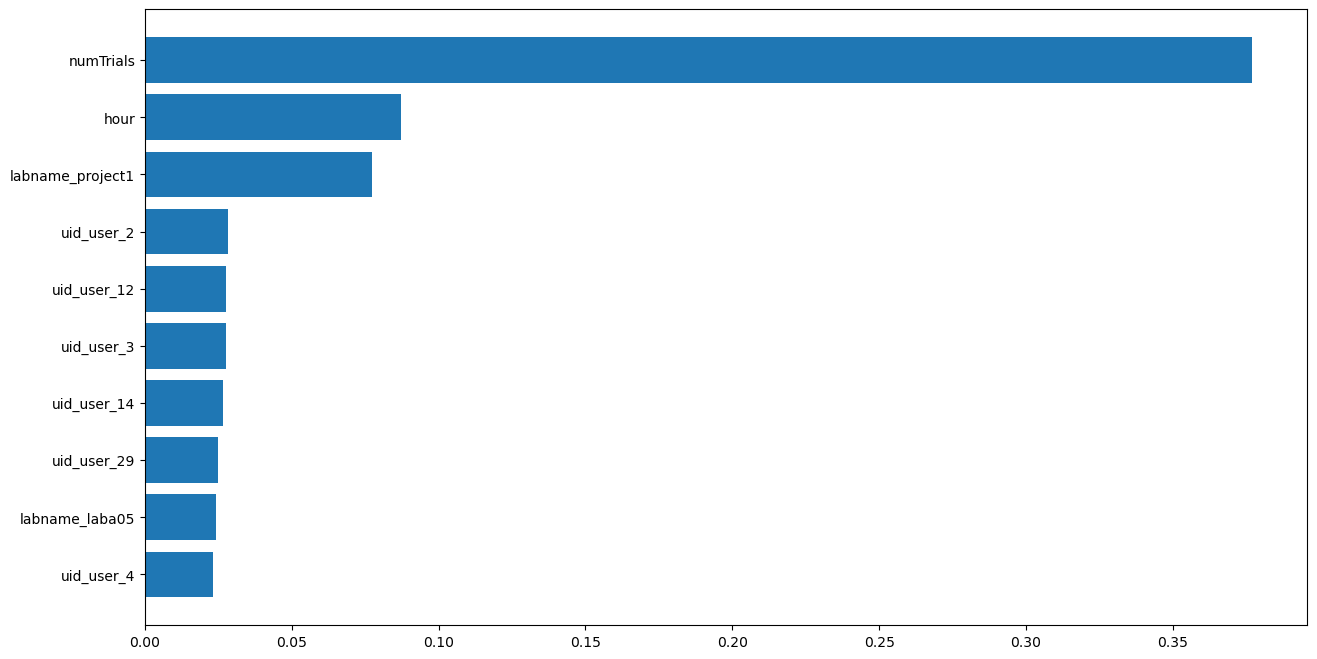

In [55]:
plot_features(dtc.feature_importances_, X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [56]:
rfm = RandomForestClassifier(n_estimators=100,
                             max_depth=25,
                             random_state=21)
rfm.fit(X, y)
pred = rfm.predict(X)

accuracy_score(y, pred)

1.0

In [57]:
rfm = RandomForestClassifier(n_estimators=10,
                             max_depth=25,
                             random_state=21)
rfm.fit(X, y)
pred = rfm.predict(X)

accuracy_score(y, pred)

0.9958481613285883

In [58]:
rfm = RandomForestClassifier(n_estimators=100,
                             max_depth=10,
                             random_state=21)
rfm.fit(X, y)
pred = rfm.predict(X)

accuracy_score(y, pred)

0.8855278766310795

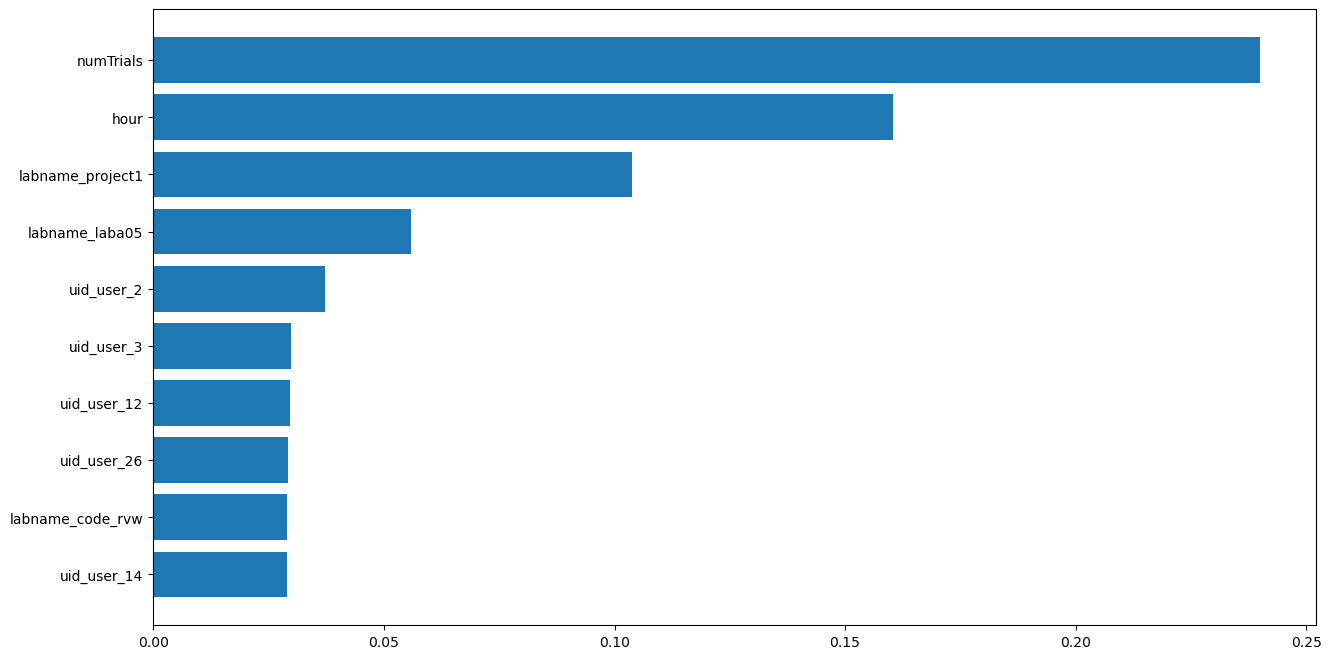

In [59]:
plot_features(rfm.feature_importances_, X.columns)